[*********************100%***********************]  1 of 1 completed


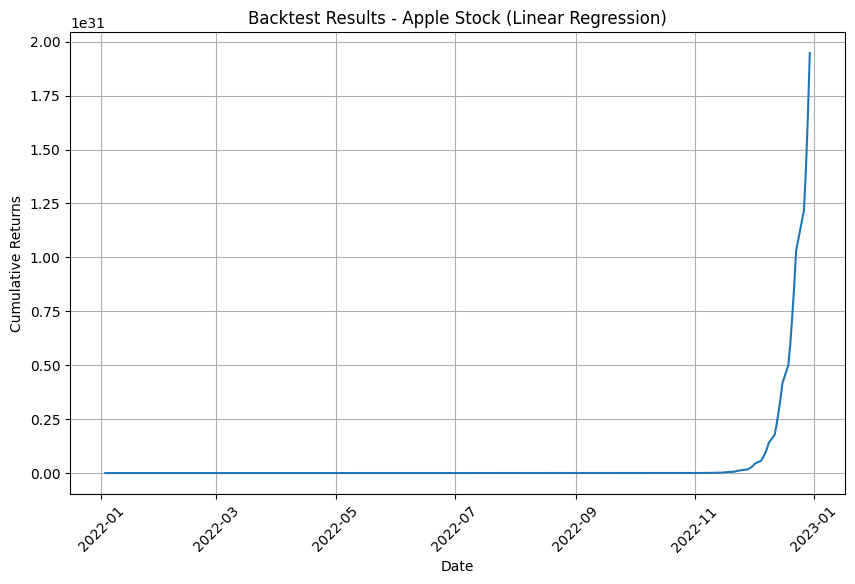

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf


# Download Apple stock data from Yahoo Finance
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-12-31"
data = yf.download(ticker, start=start_date, end=end_date)


data.reset_index(inplace=True)


# Split the data into training and testing sets
train_data = data[data['Date'] < '2022-01-01']
test_data = data[data['Date'] >= '2022-01-01']

# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['Close']

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare the testing data
X_test = np.arange(len(train_data), len(data)).reshape(-1, 1)
y_test = test_data['Close']

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the cumulative returns based on the predictions
returns = (y_test - y_pred) / y_test  # Example calculation based on the difference between actual and predicted prices
cumulative_returns = (1 + returns).cumprod()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], cumulative_returns)
plt.title('Backtest Results - Apple Stock (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


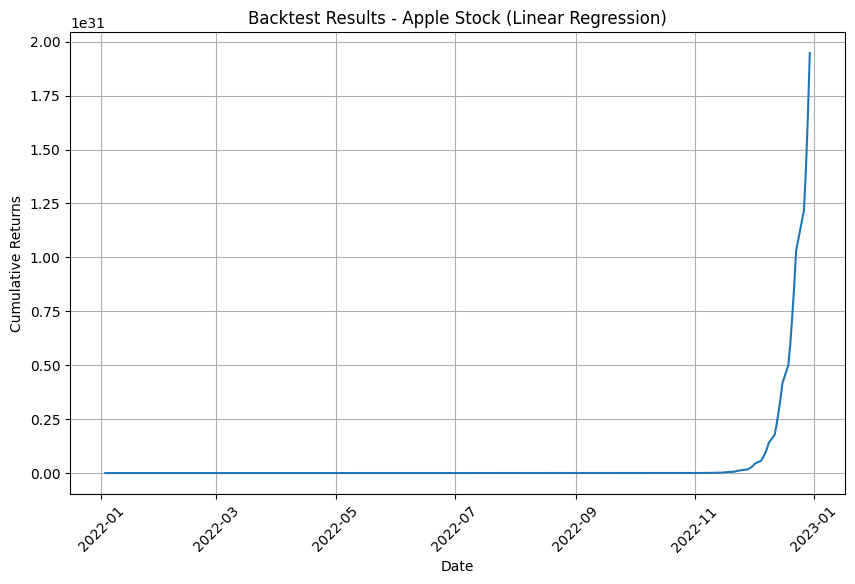